In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/insurance.csv')
print("Dataset loaded successfully! Shape:", df.shape)
df.head()


Dataset loaded successfully! Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Check for duplicates and remove them
df = df.drop_duplicates()

# 2. Outlier treatment on 'charges' column using IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['charges'] = np.where(df['charges'] < lower_bound, lower_bound, df['charges'])
df['charges'] = np.where(df['charges'] > upper_bound, upper_bound, df['charges'])

# 3. Log-transform 'charges' due to skewness
df['charges'] = np.log(df['charges'])

# 4. One-hot encode categorical variables
X = df.drop('charges', axis=1)
y = df['charges']
X = pd.get_dummies(X, drop_first=True)

# 5. Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing complete!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


Preprocessing complete!
X_train shape: (1069, 8)
X_test shape: (268, 8)


In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [6]:
# 2. Load data
df = pd.read_csv('/content/insurance.csv')
print("Data shape:", df.shape)
df.head()


Data shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# 3. Data Preprocessing

# 3.1 Handle missing values
print("Missing values:\n", df.isnull().sum())
# No missing values in this dataset

# 3.2 Fix wrong data types
print(df.dtypes)

# 3.3 Remove duplicate records
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# 3.4 Detect and treat outliers on target variable 'charges'
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['charges'] = np.where(df['charges'] < lower_bound, lower_bound, df['charges'])
df['charges'] = np.where(df['charges'] > upper_bound, upper_bound, df['charges'])

# 3.5 Transform skewed target
df['charges'] = np.log(df['charges'])

# 3.6 Handle categorical variables (one-hot encoding)
X = df.drop('charges', axis=1)
y = df['charges']
X = pd.get_dummies(X, drop_first=True)

# 3.7 Remove irrelevant or redundant features (none in this dataset)

# 3.8 Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3.9 Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing complete.")


Missing values:
 age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
Shape after removing duplicates: (1337, 7)
Preprocessing complete.


In [9]:
print("Missing values in X before train-test split:")
print(X.isnull().sum())


Missing values in X before train-test split:
age                 0
bmi                 3
children            0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


In [11]:
from sklearn.impute import SimpleImputer

# Impute missing values in 'bmi' (and any others if present) using mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame if you want (optional)
X = pd.DataFrame(X_imputed, columns=X.columns)
print(X.isnull().sum())


age                 0
bmi                 0
children            0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


In [14]:
#train and test spliting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# 4. Define evaluation function

def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {
        "R2": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    }


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# 5. Train and evaluate models

# 5.1 Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_results = regression_metrics(y_test, lr_pred)

# 5.2 Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_results = regression_metrics(y_test, dt_pred)

# 5.3 Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_results = regression_metrics(y_test, rf_pred)

# 5.4 K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_results = regression_metrics(y_test, knn_pred)

# 5.5 Support Vector Machine (SVR)
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_results = regression_metrics(y_test, svm_pred)


In [18]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define a function to compute regression metrics
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Machine': SVR(kernel='rbf')
}

# Train, predict, evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)               # Train model
    y_pred = model.predict(X_test)            # Predict on test set
    results[name] = regression_metrics(y_test, y_pred)

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                              R2       MSE      RMSE       MAE
Linear Regression       0.809056  0.160255  0.400318  0.262904
Decision Tree           0.698267  0.253237  0.503226  0.214964
Random Forest           0.826261  0.145815  0.381857  0.193336
K-Nearest Neighbors     0.820485  0.150662  0.388152  0.244466
Support Vector Machine  0.877090  0.103155  0.321178  0.149879


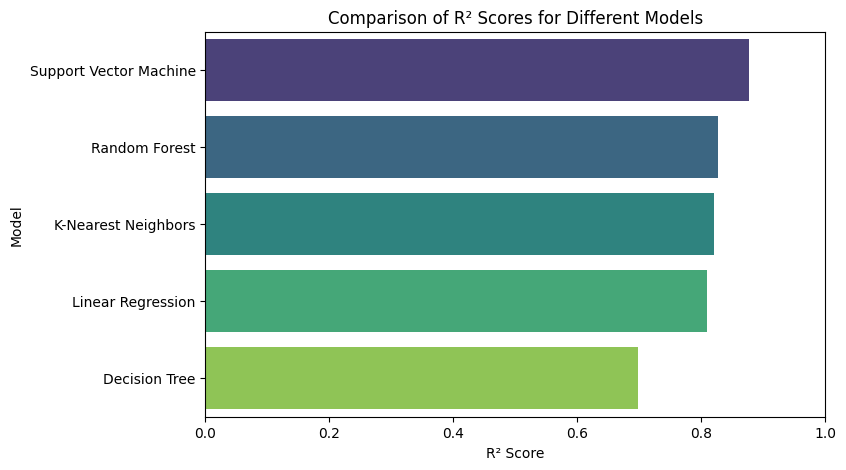

In [21]:
r2_scores = results_df['R2'].sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(
    x=r2_scores.values,
    y=r2_scores.index,
    hue=r2_scores.index,
    palette="viridis",
    legend=False
)

plt.title("Comparison of R² Scores for Different Models")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()
